# Plotting Maps

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import os
import folium

In [23]:
def filter_zero(dict):
    result = {key: value for key, value in dict.items() if abs(value) > 1e-5}
    return result

In [18]:
DATA_PATH = '../data'
PRICES_PATH = os.path.join(DATA_PATH, 'prices')
SIMULATION_DATA_PATH = os.path.join(DATA_PATH, 'simulation data')
prices = pd.read_csv(os.path.join(PRICES_PATH, 'Spain_prices.csv'))

In [19]:
df_list = []
for file_name in os.listdir(SIMULATION_DATA_PATH):
    df = pd.read_csv(os.path.join(SIMULATION_DATA_PATH, file_name),sep = ',', comment = '#')
    file_name_split = file_name.split('_')
    df['lat_lon'] = file_name_split[2]+ '_' + file_name_split[3]
    df_list.append(df)
production = pd.concat(df_list)

In [20]:
extreme_w = [{'37.3467_-5.6815': 0.0,
  '37.5021_-4.4298': 0.4446174671933166,
  '37.6571_-2.4870': 0.0,
  '38.3250_-3.2432': 0.0,
  '38.4885_-5.0687': 0.0,
  '38.5089_-1.1831': 0.0,
  '38.7432_-6.7377': 0.0,
  '40.2523_-1.9654': 0.0,
  '40.3220_-0.1269': 0.0,
  '40.3617_-4.5602': 0.0,
  '40.5403_-6.2422': 0.0,
  '41.3479_1.0205': 0.0,
  '41.5629_-5.7467': 0.0,
  '41.5727_-1.7437': 0.0,
  '41.5824_-3.7648': 0.0,
  '41.6591_0.8423': 0.240730443887266,
  '42.4587_-8.3965': 0.2599428641897448,
  '42.9692_-1.9821': 0.0547092247296728,
  '43.0932_-4.2335': 0.0,
  '43.1742_-6.5667': 0.0},
 {'37.3467_-5.6815': 0.0982742555075485,
  '37.5021_-4.4298': 0.0,
  '37.6571_-2.4870': 0.0,
  '38.3250_-3.2432': 0.0,
  '38.4885_-5.0687': 0.0,
  '38.5089_-1.1831': 0.0,
  '38.7432_-6.7377': 0.166384179115139,
  '40.2523_-1.9654': 0.0510282287489681,
  '40.3220_-0.1269': 0.1445065058804274,
  '40.3617_-4.5602': 0.0,
  '40.5403_-6.2422': 0.0,
  '41.3479_1.0205': 0.0470048785665864,
  '41.5629_-5.7467': 0.0034439005583212,
  '41.5727_-1.7437': 0.0953879572968595,
  '41.5824_-3.7648': 0.0,
  '41.6591_0.8423': 0.0,
  '42.4587_-8.3965': 0.3059253253084997,
  '42.9692_-1.9821': 0.0880447690176501,
  '43.0932_-4.2335': 0.0,
  '43.1742_-6.5667': 0.0},
 {'37.3467_-5.6815': 0.0,
  '37.5021_-4.4298': 0.0,
  '37.6571_-2.4870': 0.0,
  '38.3250_-3.2432': 0.0,
  '38.4885_-5.0687': 0.0,
  '38.5089_-1.1831': 0.0,
  '38.7432_-6.7377': 0.0,
  '40.2523_-1.9654': 0.0,
  '40.3220_-0.1269': 0.0,
  '40.3617_-4.5602': 0.0,
  '40.5403_-6.2422': 0.0,
  '41.3479_1.0205': 0.0,
  '41.5629_-5.7467': 0.0,
  '41.5727_-1.7437': 1.0,
  '41.5824_-3.7648': 0.0,
  '41.6591_0.8423': 0.0,
  '42.4587_-8.3965': 0.0,
  '42.9692_-1.9821': 0.0,
  '43.0932_-4.2335': 0.0,
  '43.1742_-6.5667': 0.0}]

In [21]:
# Plot all locations
locations = pd.DataFrame({'lat_lon': production['lat_lon'].unique()})
locations['lat'] = locations['lat_lon'].str.split('_').str[0]
locations['lon'] = locations['lat_lon'].str.split('_').str[1]
gdf = gpd.GeoDataFrame(locations, geometry=gpd.points_from_xy(locations.lon, locations.lat), crs="EPSG:4326"
)

In [24]:
filter_zero(extreme_w[0])

{'37.5021_-4.4298': 0.4446174671933166,
 '41.6591_0.8423': 0.240730443887266,
 '42.4587_-8.3965': 0.2599428641897448,
 '42.9692_-1.9821': 0.0547092247296728}

In [25]:

locations = pd.DataFrame({'lat_lon': filter_zero(extreme_w[0]).keys()})
locations['lat'] = locations['lat_lon'].str.split('_').str[0]
locations['lon'] = locations['lat_lon'].str.split('_').str[1]
gdf = gpd.GeoDataFrame(locations, geometry=gpd.points_from_xy(locations.lon, locations.lat), crs="EPSG:4326"
)

In [26]:
spain_center = [40.0, -3.5]
m = folium.Map(location=spain_center, zoom_start=6, tiles=None)

# Add OpenTopoMap: terrain with hills and blue sea (free and no key needed)
folium.TileLayer(
    tiles='https://{s}.tile.opentopomap.org/{z}/{x}/{y}.png',
    attr='Map data © OpenStreetMap contributors, SRTM | Map style: OpenTopoMap (CC-BY-SA)',
    name='OpenTopoMap',
    overlay=False,
    control=True
).add_to(m)

# Add your data on top
folium.GeoJson(gdf, name="Your Data").add_to(m)

folium.LayerControl().add_to(m)

m.save("spain_opentopo.html")
m

In [9]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

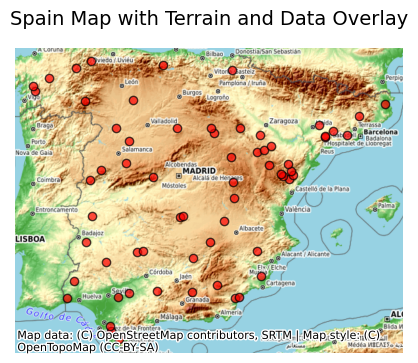

In [15]:
fig, ax = plt.subplots(figsize=(5, 5))  # Moderate figure size



gdf = gdf.to_crs(epsg=3857)
# Plot your data
gdf.plot(ax=ax, color='red', edgecolor='black', alpha=0.7)

# Add OpenTopoMap basemap (terrain + blue sea)
ctx.add_basemap(
    ax,
    source=ctx.providers.OpenTopoMap,
    zoom=6
)

# Clean up plot
ax.set_axis_off()
ax.set_title("Spain Map with Terrain and Data Overlay", fontsize=14)

# Save as PNG
plt.savefig("spain_static_map.png", bbox_inches='tight', dpi=600)
plt.show()